## Final Project Submission

Please fill out:
* Student name: Laura Lewis
* Student pace: full time
* Scheduled project review date/time: 8 February 2019, 4pm GMT/11am EST
* Instructor name: Joe San Pietro
* Blog post URL:


***
**You'll clean, explore, and model this dataset with a multivariate linear regression to predict the sale price of houses as accurately as possible.**

**Based on the results of your models, your presentation should discuss at least two concrete features that highly influence housing prices.**

**Go through the Jupyter Notebook, answering questions about how you made certain decisions. Be ready to explain things like:**
* "how did you pick the question(s) that you did?"
* "why are these questions important from a business perspective?"
* "how did you decide on the data cleaning options you performed?"
* "why did you choose a given method or library?"
* "why did you select those visualizations and what did you learn from each of them?"
* "why did you pick those features as predictors?"
* "how would you interpret the results?"
* "how confident are you in the predictive quality of the results?"
* "what are some of the things that could cause the results to be wrong?"

### Technical Report Must-Haves

For this project, your Jupyter Notebook should meet the following specifications:

#### Organization/Code Cleanliness

* The notebook should be well organized, easy to follow,  and code should be commented where appropriate.  
    * Level Up: The notebook contains well-formatted, professional looking markdown cells explaining any substantial code.  All functions have docstrings that act as professional-quality documentation
* The notebook is written for a technical audiences with a way to both understand your approach and reproduce your results. The target audience for this deliverable is other data scientists looking to validate your findings. 

#### Visualizations & EDA

* Your project contains at least 4 _meaningful_ data visualizations, with corresponding interpretations. All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)  
* You pose at least 3 meaningful questions and aswer them through EDA.  These questions should be well labled and easy to identify inside the notebook. 
    * **Level Up**: Each question is clearly answered with a visualization that makes the answer easy to understand.   
* Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project **through the OSEMN framework**. 
    
#### Model Quality/Approach

* Your model should not include any predictors with p-values greater than .05.  
* Your notebook shows an iterative approach to modeling, and details the parameters and results of the model at each iteration.  
    * **Level Up**: Whenever necessary, you briefly explain the changes made from one iteration to the next, and why you made these choices.  
* You provide at least 1 paragraph explaining your final model.   
* You pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset.   
***

**Project plan (OSEMN framework):**

Obtain:

- Import data using pandas read.csv
- Research and understand variables

Scrub:

- Null values
- Outliers
- Missing values - drop, keep or impute
- Removing rows or columns
- Converting formats

Explore:
- Transformation - standardisation and normalisation

Model:

Interpret:

***
# Obtaining the data

### _Importing the data_

In this section, the data (and libraries) will be imported and inspected to see if any initial adjustments are necessary e.g. changing the index. Any necessary research into the variables will also be conducted.

In [1]:
# Importing libraries to be used in this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
% matplotlib inline
import seaborn as sns

In [2]:
kc = pd.read_csv('kc_house_data.csv') # Import csv
pd.set_option('display.max_columns', None) # Displays all columns. Can be reset with: pd.reset_option('display.max_columns')
kc.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


An id field is already included. A quick check can be run using value_counts to see whether these are unique values and could therefore be used as the index:

In [3]:
kc.id.value_counts().head()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
Name: id, dtype: int64

In [4]:
kc.loc[kc['id'] == 795000620] # Checking one example of repeated id values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,9/24/2014,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,12/15/2014,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,2,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,3/11/2015,157000.0,3,1.0,1080,6250,1.0,NaN,0.0,2,5,1080,0.0,1950,NaN,98168,47.5045,-122.33,1070,6250


Some id numbers are repeated because the same house was sold on several different dates, so this is not suitable as a primary key/index. It can therefore be dropped, as it does not give us any useful information for the purposes of this analysis.

In [5]:
kc.drop(['id'], axis=1, inplace=True)

### _Understanding the variables_

#### Column names and descriptions for Kings County Data Set, from `column_names.md`:
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

It is not immediately obvious what condition and grade refer to, and so these require further investigation. The King County website (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) gives the following definitions. To summarise, building condition is rated on a 1-5 scale where 5 is highest, and building grade is rated on a 1-13 scale where 13 is highest.

**BUILDING CONDITION**

Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility. 

**BUILDING GRADE**

Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

***
# Scrubbing the data

In this section, the data will be pre-processed. This will include looking for null values, missing values, incorrect data types (e.g. numbers stored as strings, or categorical data stored as integers) and multicollinearity, and taking actions including dropping rows or columns, imputing values and casting data types.

### _Checking data types and null values_

#### Initial inspection

In [6]:
kc.info() # Inspect meta-data for the dataset, to see data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.3+ MB


In [7]:
kc.describe() # Descriptive statistics for numerical columns

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
kc.isnull().sum() # Checking the number of null values in each column

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

An initial inspection reveals that there are 21,597 rows in the dataset. The dataset is not so large that it is worth sub-setting to speed up processing time.

There are 8 variables classed as floats, 11 as integers and 2 as string.

There are three ways that null or unknown values might be stored - as missing (null) values, or with a placeholder for unknown values (e.g. 'NA', 'Nan') entered as a string, or in numerical data as an unlikely numerical category. The view and yr_renovated variables contain the former.

#### Changes to data types and dealing with null values:

_Date_ - cast to datetime. Can possibly later be reformatted to month and year, to allow for the assessment of whether there are any significant changes in price over time that need to be accounted for - but the day can probably be dropped as this level of detail is unnecessary given that this project will not include time series/seasonality analysis.

In [9]:
kc.date = pd.to_datetime(kc.date) # Use the pandas 'to_datetime' function to cast the string as a date
kc.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


_Bathrooms_ - presumably a float because .5 of a bathroom refers to a toilet and sink but no bath/shower, and 0.25 of a bathroom refers to just a toilet. Checking the unique values reveals that this is correct, and only legitimate decimals (.25, .5 and .75 for various bathroom fitting combinations) are used.

In [10]:
kc.bathrooms.unique() # Checking which unique values for bathroom appear

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

_Floors_ - currently stored as a float, but should it be an integer? However, after checking the unique values it seem that the only decimals used are .5 mezzanines are used, so this is ok to leave as a float.

In [11]:
kc.floors.unique() # Checking which unique values for floors appear

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

_Waterfront_ - currently stored as a float. Checking the values reveals that this is a boolean variable with 1s and 0s (and some null values), and so it should be cast to a string rather than storing it as a float. Null values were replaced with 0 (the median and mode).

In [12]:
kc.waterfront.value_counts() # Checking category counts

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [13]:
kc.waterfront.isna().sum()

2376

In [14]:
kc.waterfront.fillna(0, inplace=True) # Replace all null values in waterfront with 0

In [15]:
kc.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [16]:
kc.waterfront = kc.waterfront.astype('str') # Casting the waterfront column to a string

_View_ - currently stored as a float, but defined as 'has been viewed' which implies a boolean variable for whether or not a property has been viewed. However, checking the unique values reveals that this is not the case - values are 0, 1, 2, 3, 4 and nan. It could be the number of times a property has been viewed, but the low max and cardinality suggest not. The most likely explanation is that it is another integer grading system similar to condition and grade. Research online for other analyses of this dataset provides both definitions, but the latter (a grading of the view quality from 0-4, with 4 being the highest) is the most commonly accepted and will be used. Counts of rows in each view category reveals that the vast majority (90%) of entries have a view of 0. Null values will be replaced with 0.

In [17]:
kc.view.unique() # Checking which unique values for view appear

array([ 0., nan,  3.,  4.,  2.,  1.])

In [18]:
print(kc.view.value_counts()) # Counts of rows for each possible value for view
print((kc.view.value_counts().head(1)/kc.view.value_counts().sum())*100) # Percentage of rows in the most common view category

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64
0.0    90.192254
Name: view, dtype: float64


In [19]:
kc.view.fillna(0, inplace=True)

In [20]:
kc.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

*Sqft_basement* - should be an integer (or possibly float) as with other sqft measurements. However, attempting to cast it to an integer produces an error, because some values contain text (making this a string variable). The row counts for each unique value reveal that 454 rows have a sqft_basment value of '?', hence this error. This represents 2.1% of data, so it is not worth removing the column. The options for dealing with this are: drop the rows containing '?', replace them with the column average (in this case a value of 0 would be most appropriate, as this is over half of the values and so would be both the mode and the median), or use coarse classification to bin the data and use ? as a category. Dropping data loses data and binning data reduces granularity of data. In this case, given that the majority of entries contain the same value (0), it is relatively safe to replace missing values with 0.

In [21]:
kc.sqft_basement.value_counts().sort_values(ascending=False) # Counts of rows for each possible value of sqft_basement

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
300.0       142
900.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
1770.0        1
1798.0        1
1852.0        1
2610.0        1
65.0          1
588.0         1
2730.0        1
2500.0        1
20.0          1
1008.0        1
415.0         1
768.0         1
1913.0        1
946.0         1
2490.0        1
2570.0        1
2250.0        1
518.0         1
915.0         1
207.0         1
784.0         1
276.0         1
283.0         1
2190.0        1
374.0         1
274.0         1
602.0         1
475.0         1
652.0         1
172.0         1
Name: sqft_basement, Len

In [22]:
kc.loc[kc['sqft_basement'] == '?', 'sqft_basement'] = 0 # Replace all values of '?' with 0
kc.sqft_basement = kc.sqft_basement.astype('float').astype('int64') # Cast to integer (via float to deal with '0.0')
kc.sqft_basement.dtype # Confirm type is correctly cast

dtype('int64')

*Yr_renovated* - should be an integer rather than a float, as with yr_built. However, there are 3,842 null values. This would be too many rows to remove from the dataset (17.8%). It is not possible to replace them with the mean year, because this could result in renovation years being prior to build years, which is impossible. Binning would reduce the granularity of data. One option would be to replace the null values with the year that represents the average amount of time between building and renovating a property. However, the easiest solution in this option is to replace the null values with the mode value 0.

In [23]:
kc.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [24]:
kc.yr_renovated.isna().sum() # Number of null values

3842

In [25]:
kc.yr_renovated.value_counts().sort_values(ascending=False)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
2010.0       15
1983.0       15
2001.0       15
1999.0       15
2008.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1955.0        3
1956.0        3
1972.0        3
1945.0        3
1960.0        3
1958.0        3
1978.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1976.0        1
1971.0        1
1959.0        1
1946.0        1
1948.0        1
1951.0        1
1944.0        1
1934.0        1
1950.0        1
1953.0        1
1954.0        1
Name: yr_renovated, Leng

In [26]:
kc.yr_renovated.fillna(0, inplace=True) # Replace all null values in yr_renovated with 0
kc.yr_renovated = kc.yr_renovated.astype('int64') # Casting the yr_renovated column to an integer
kc.yr_renovated.dtype # Confirm type is correctly cast

dtype('int64')

_Zipcode_ - currently stored as an integer, but should be a string as these is a categorical rather than a continuous variable. A check of unique values reveals no '?'s or other missing value placeholders.

In [27]:
kc.zipcode = kc.zipcode.astype('str')

In [28]:
kc.zipcode.unique()

array(['98178', '98125', '98028', '98136', '98074', '98053', '98003',
       '98198', '98146', '98038', '98007', '98115', '98107', '98126',
       '98019', '98103', '98002', '98133', '98040', '98092', '98030',
       '98119', '98112', '98052', '98027', '98117', '98058', '98001',
       '98056', '98166', '98023', '98070', '98148', '98105', '98042',
       '98008', '98059', '98122', '98144', '98004', '98005', '98034',
       '98075', '98116', '98010', '98118', '98199', '98032', '98045',
       '98102', '98077', '98108', '98168', '98177', '98065', '98029',
       '98006', '98109', '98022', '98033', '98155', '98024', '98011',
       '98031', '98106', '98072', '98188', '98014', '98055', '98039'],
      dtype=object)

A final check of data types:

In [29]:
kc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null int64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null object
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(11), object(2)
memory usage: 3.3+ MB


A final check for null values:

In [30]:
kc.isna().sum().sum()

0

### _Checking for multicollinearity_

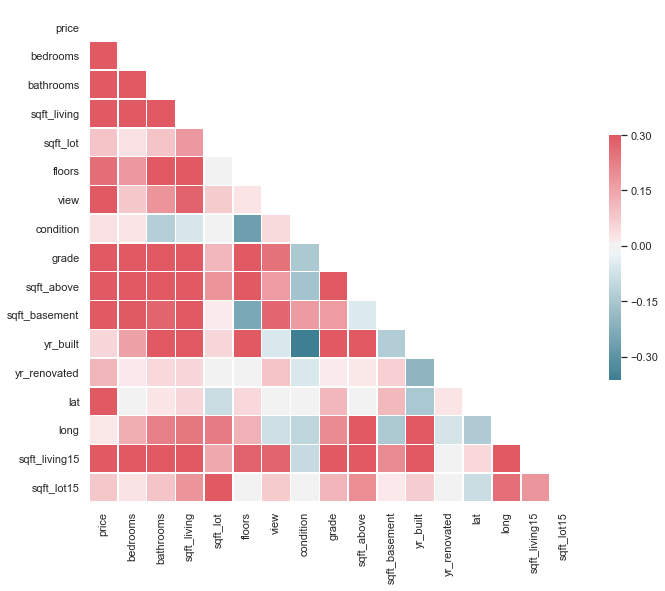

In [31]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = kc.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});

There are quite a few columns that are mildly correlated with each other, including several that appear to be share about 30% of their variation with the target variable (price). However, no variables are so strongly correlated that they need to be removed.

***
# Exploring the data

In this section, exploratory data analysis will be conducted, as will any additional pre-processing/cleaning tasks that become apparently. This will include inspecting distributions, checking for outliers in continuous numerical data, transformation (standardisation/normalisation), one-hot encoding, and checking the dataset meets the assumptions required for linear regression.

### _Inspecting distributions and conducting transformations_

The histograms below show the distributions for each variable.

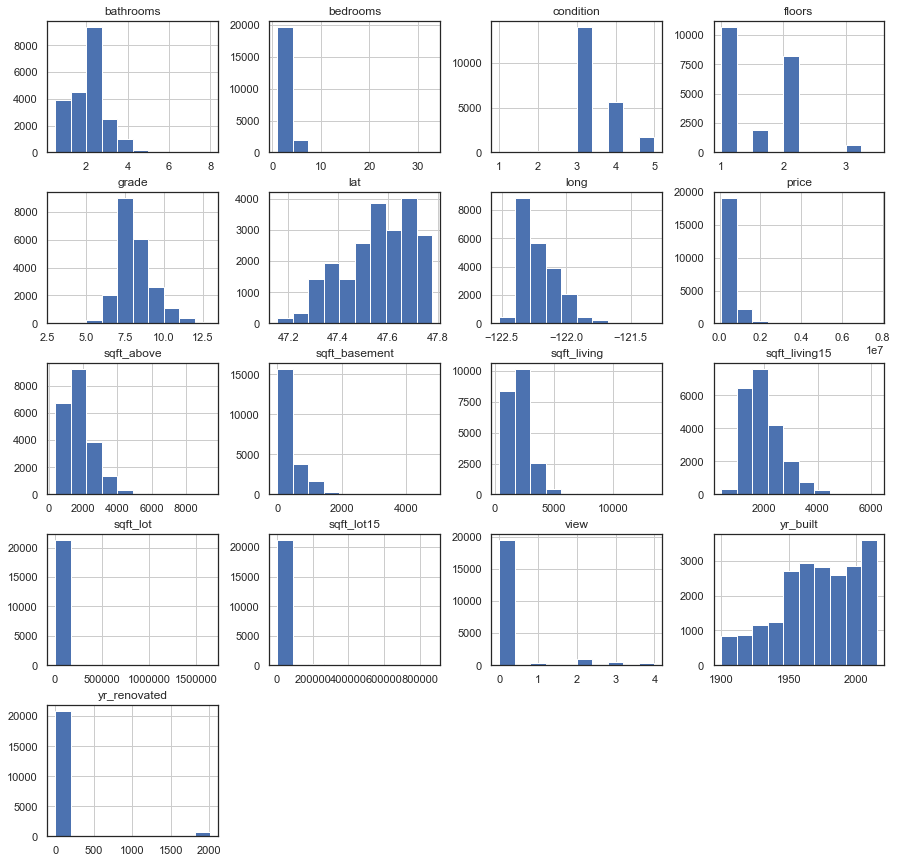

In [32]:
kc.hist(figsize=(15,15));

#### Initial visual inspection of distributions:

- Bathrooms and grade are fairly normally distributed
- Bedrooms has some high outliers which require additional inspection and possibly log transformation
- Condition, floors and view have only a small number of groupings and are not normally distributed
- Latitude is roughly normally distributed but negatively skewed
- Longitude, sqft_above, sqft_basement, sqft_living and sqft_living15 are roughly normally distributed but positively skewed, and may require log transformation
- Price is heavily positively skewed and will require log transformation
- Sqft_lot, sqft_lot15 and yr_renovated appear to have some high outliers which require additional inspection and possibly log transformation
- Yr_built is not very normally distributed, and is negatively skewed

#### Log-transformation:

Potential candidates for log-transformation are: bathrooms, bedrooms, grade, long, price, sqft_above, sqft_basement, sqft_living, sqft_living15, sqft_lot, sqft_lot15, yr_renovated. New columns for log-transformed versions of these variables will be created, and they will be compared below with the non log-transformed versions in terms of how well they meet the assumptions for linear regression.

Log transform variables

### _One-hot encoding_

Waterfront - 1 (yes) and 0 (no)

### _Checking the assumptions for linear regression_

Compare Q-Q and residual plots for log-transformed variables.

From section 10 project, for creating Q-Q plots etc:

import statsmodels.stats.api as sms

results = [['independent_variable', 'r_squared', 'intercept', 'slope', 'p-value', 'normality (JB)' ]]

for i, col in enumerate(['crim', 'dis', 'rm', 'zn', 'age']):
    # Print section title
    print('Boston Housing DataSet - Regression Analysis and Diagnostics for formula: medv~' + col)
    print('-------------------------------------------------------------------------------------')
    
    #Creating the OLS regression model 
    f = 'medv~' + col
    model = ols(formula=f, data=new_df).fit()

    # Constructing the regression line
    reg_xs = pd.DataFrame({col: [new_df[col].min(), new_df[col].max()]})
    reg_ys = model.predict(reg_xs)

    # Plotting the scatterplot and regression line
    plt.scatter(new_df[col], new_df.medv, color='royalblue', marker='.')
    plt.plot(reg_xs, reg_ys)
    plt.show();

    # Plotting the residuals
    fig = plt.figure(figsize=(12,8))
    sm.graphics.plot_regress_exog(model, col, fig=fig)
    plt.show()

    # Q-Q plot
    sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    plt.show()
    
    # Add results from each iteration as a new list in results, so that it can be turned into a pandas dataframe with
    # the first row as the column names
    results.append([col, model.rsquared, model.params[0], model.params[1], model.pvalues[1], sms.jarque_bera(model.resid)[0]])